In [7]:
# ДЗ
# 1. Подберите парамтеры алгоритма разрастания регионов так, чтобы был выделен весь участок газона.
# 2. Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
# 3. Применить алгоритм сегментации watershed+distance transform для задачи подсчета пальмовых деревьев.

In [8]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

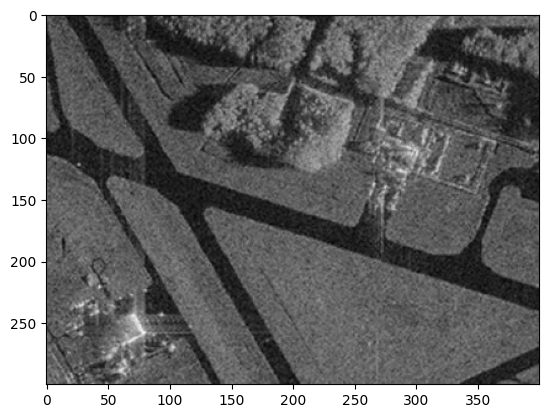

In [9]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray)

In [10]:
def homo_average(img, mask, point, T):
    av_val = img[mask > 0].sum() / np.count_nonzero(img[mask > 0])
    if abs(av_val - img[point]) <= T:
        return True
    return False


def homo_diff(img, mask, point, T):
    x, y = point
    roi = img[x - 1:x + 2, y - 1:y + 2]
    if np.all(abs(np.int16(img[point]) - np.int16(roi)) <= T):
        return True
    return False


def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image_gray.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image_gray.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r,
                                            j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask

    return mask * 255


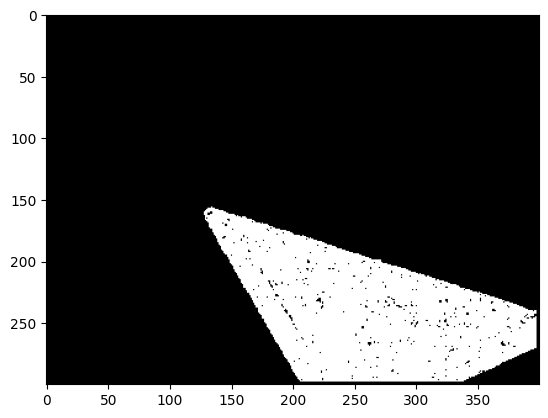

In [11]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_average, 2, 20)
plt.imshow(mask, cmap="gray")

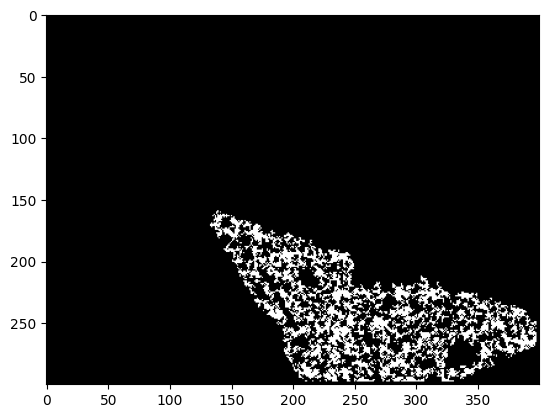

In [12]:
seed_point = (250, 250)
mask = region_growing(image_gray, seed_point, homo_diff, 2, 12)
plt.imshow(mask, cmap="gray")

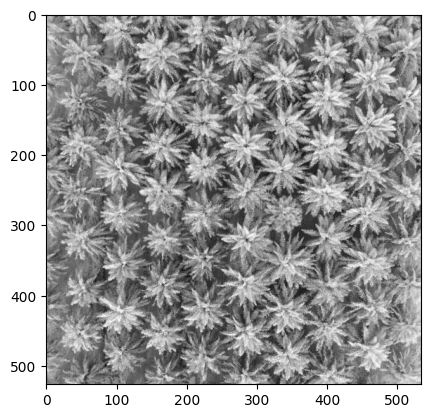

In [13]:
image = cv2.imread('./palm_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(image_gray)

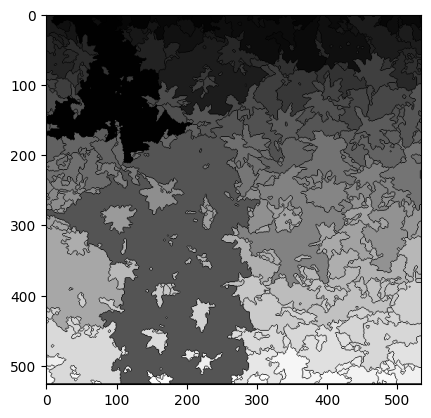

In [14]:
ret, thresh = cv2.threshold(image_gray, 0, 255,
                            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist, 0.1 * dist.max(), 255, cv2.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8)
ret, markers = cv2.connectedComponents(sure_fg)
markers = cv2.watershed(image, markers)
plt.imshow(markers, cmap="gray")